In [6]:
import mnist_loader
import itertools
import copy

import j_network as network

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

#QuadraticCost , CrossEntropyCost / Sigmoid , Relu , Tanh
net = network.Network([784, 100, 10], cost=network.QuadraticCost, active=network.Sigmoid)

#net.default_weight_initializer()
net.xavier_weight_initializer()
#net.he_weight_initializer()

#itertools.islice(training_data, 1000)
evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = net.SGD(itertools.islice(training_data, 10000), 30, 10, 0.1, lmbda = 0.1, 
                                                                        evaluation_data=test_data,
                                                                        monitor_evaluation_cost=True, monitor_evaluation_accuracy=True, 
                                                                        monitor_training_cost=True, monitor_training_accuracy=True)

#print("train accuray : ", training_accuracy[-1])
#print("train cost : ", training_cost[-1])
#print("test accuracy : ", evaluation_accuracy[-1])
#print("test cost : ", evaluation_cost[-1])

----------Epoch 0 training complete----------
Cost on training data: 0.16807106109792933
Accuracy on training data: 8503 / 10000
Cost on evaluation data: 0.1712628609667562
Accuracy on evaluation data: 8505 / 10000
----------Epoch 1 training complete----------
Cost on training data: 0.11089224353817771
Accuracy on training data: 8907 / 10000
Cost on evaluation data: 0.11555726578309514
Accuracy on evaluation data: 8834 / 10000
----------Epoch 2 training complete----------
Cost on training data: 0.09345646659415707
Accuracy on training data: 9067 / 10000
Cost on evaluation data: 0.09837822357358836
Accuracy on evaluation data: 8970 / 10000
----------Epoch 3 training complete----------
Cost on training data: 0.08324623092082457
Accuracy on training data: 9142 / 10000
Cost on evaluation data: 0.0894660824584735
Accuracy on evaluation data: 9046 / 10000
----------Epoch 4 training complete----------
Cost on training data: 0.07661384401902588
Accuracy on training data: 9214 / 10000
Cost on e

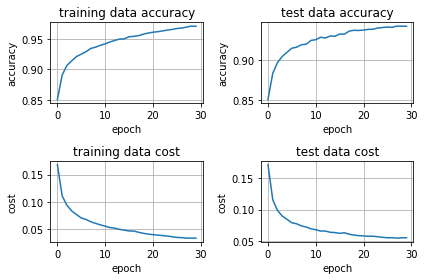

test accuracy :  9424
test cost :  0.41841596764184497


In [7]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(0, 30, 1)

ax = plt.subplot(221)
y = [i/10000 for i in training_accuracy]
ax.plot(z, y)
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_title('training data accuracy')

ax = plt.subplot(222)
y = [i/10000 for i in evaluation_accuracy]
ax.plot(z, y)
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_title('test data accuracy')

ax = plt.subplot(223)
y = [i for i in training_cost]
ax.plot(z, y)
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('cost')
ax.set_title('training data cost')

ax = plt.subplot(224)
y = [i for i in evaluation_cost]
ax.plot(z, y)
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('cost')
ax.set_title('test data cost')
plt.tight_layout()
plt.show()


training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
print("test accuracy : ", net.accuracy(copy.deepcopy(test_data)))
print("test cost : ", net.total_cost(copy.deepcopy(test_data), 7.5, convert=True)) #lambda